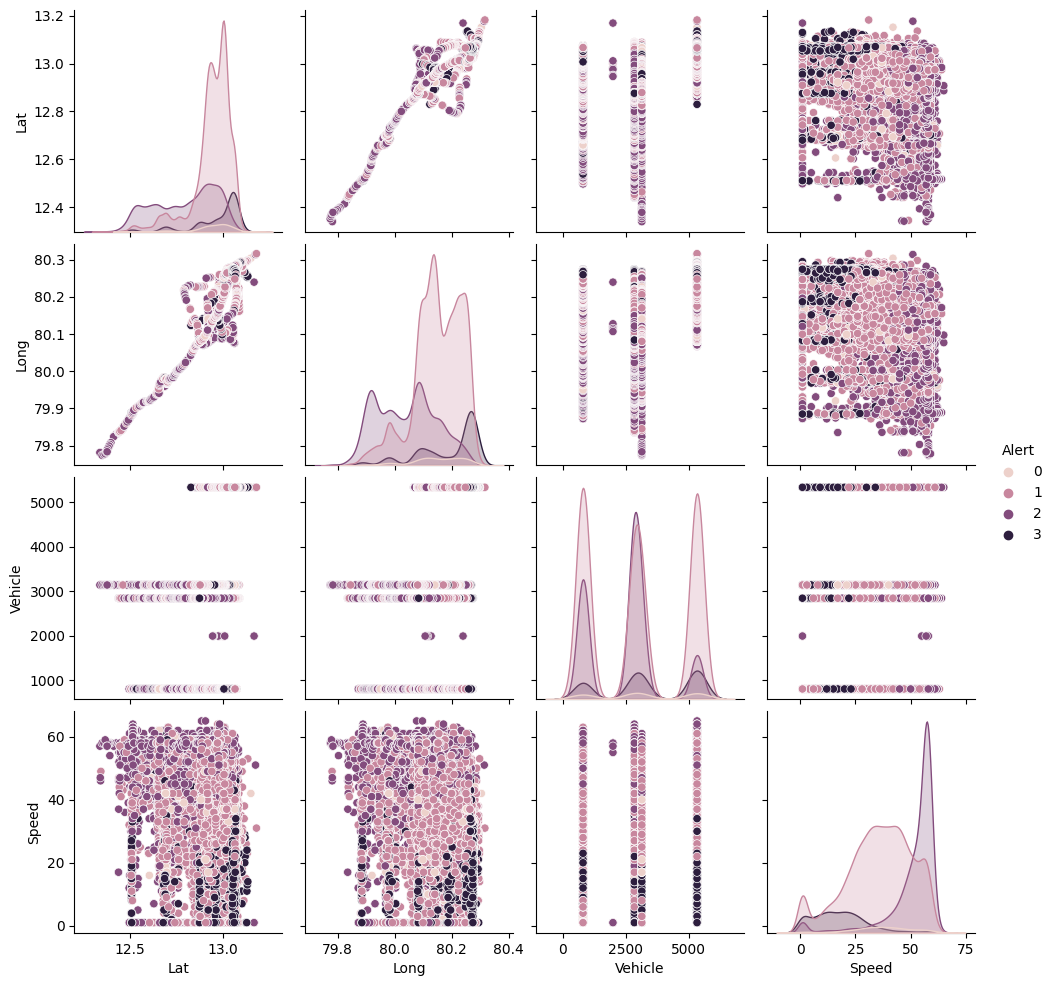

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
data = pd.read_csv('data.csv')
le = LabelEncoder()
data['Alert'] = le.fit_transform(data['Alert'])
data.dropna(inplace=True)
data.fillna(0, inplace=True)
sns.pairplot(data, hue='Alert')
plt.show()
data.describe()
model = LogisticRegression()
model.fit(data[['Speed', 'Lat', 'Long']], data['Alert'])
predictions = model.predict_proba(data[['Speed', 'Lat', 'Long']])[:, 1]
data['Likelihood of Collision'] = predictions
data['likely_collision'] = (data['Likelihood of Collision'] >= 0.5).astype(int)
data['not_likely_collision'] = (data['Likelihood of Collision'] < 0.5).astype(int)
data.to_csv('output_data.csv')


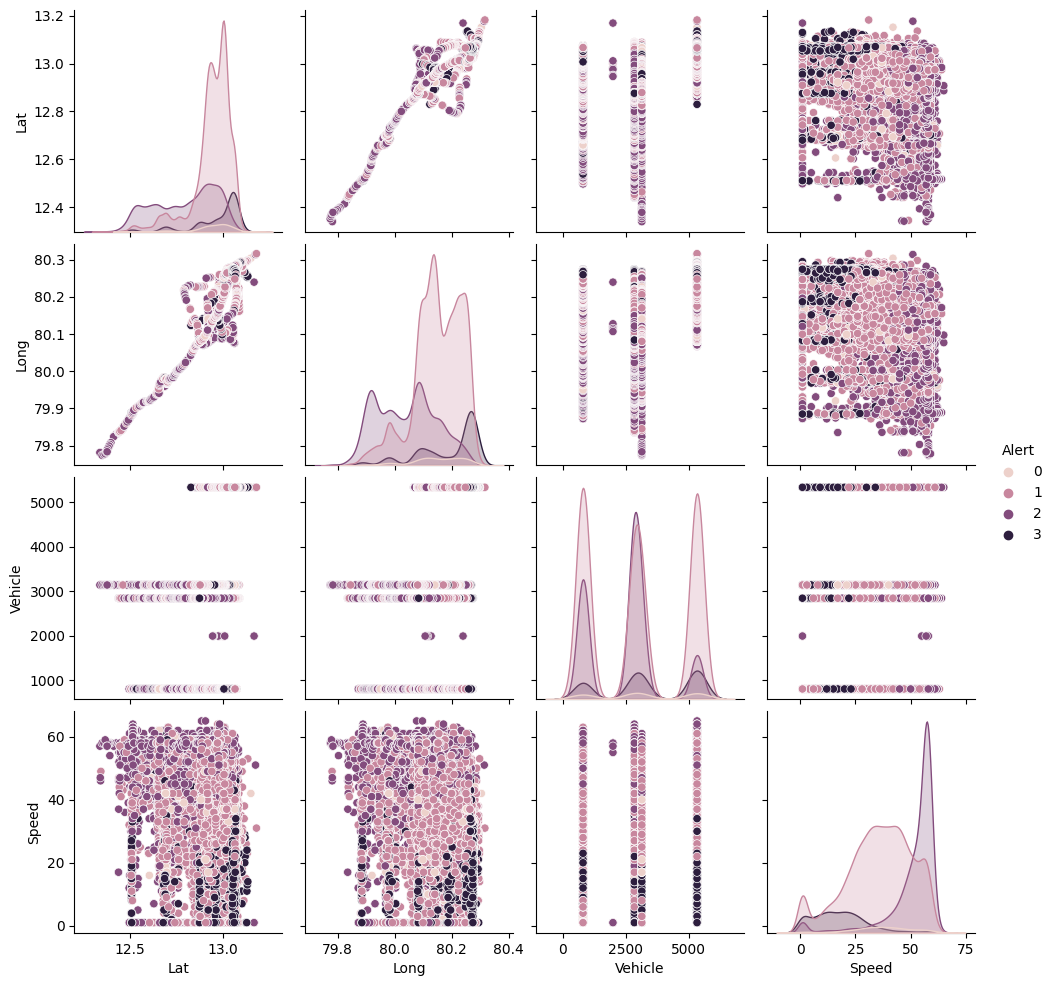

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
data = pd.read_csv('data.csv')
le = LabelEncoder()
data['Alert'] = le.fit_transform(data['Alert'])
data.dropna(inplace=True)
data.fillna(0, inplace=True)
sns.pairplot(data, hue='Alert')
plt.show()
data.describe()
model = LogisticRegression()
model.fit(data[['Speed', 'Lat', 'Long']], data['Alert'])
predictions = model.predict_proba(data[['Speed', 'Lat', 'Long']])[:, 1]
data['Likelihood of Collision'] = predictions
data['likely_collision'] = (data['Likelihood of Collision'] >= 0.5).astype(int)
data['not_likely_collision'] = (data['Likelihood of Collision'] < 0.5).astype(int)
data['Head-on collision'] = 0
data['Rear-end collision'] = 0
data['Side-impact collision'] = 0
data['Pedestrian collision'] = 0
data['Multi-vehicle collision'] = 0
data['Hit-and-run collision'] = 0
data['Wrong-way collision'] = 0
for index, row in data.iterrows():
    if row['Alert'] == 1:
        if row['Speed'] > 70:
            data.loc[index, 'Head-on collision'] = 1
        if row['Speed'] < 20:
            data.loc[index, 'Rear-end collision'] = 1
        if row['Lat'] > 0 and row['Long'] < 0:
            data.loc[index, 'Side-impact collision'] = 1
        if row['Lat'] == 0 and row['Long'] == 0:
            data.loc[index, 'Pedestrian collision'] = 1
        if row['Speed'] > 60:
            data.loc[index, 'Multi-vehicle collision'] = 1
        if row['Speed'] > 80:
            data.loc[index, 'Hit-and-run collision'] = 1
        if row['Lat'] < 0:
            data.loc[index, 'Wrong-way collision'] = 1
data.to_csv('output_data.csv')
